In [25]:
samp_data=pd.read_clipboard()

In [27]:
from IPython.display import FileLink


In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0-beta1'

## Must be written at code start

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

## sample snippet showing tf.function and eager execution


In [16]:
# Define the forward pass
@tf.function
def single_layer(x, y):
    return tf.nn.relu(tf.matmul(x, y))

# Generate random data drawn from a uniform distribution
x = tf.random.uniform((2, 3))
y = tf.random.uniform((3, 5))

# by default eager execution is enabled
# can be disabled by using  tf.compat.v1.disable_eager_execution()
single_layer(x, y).numpy()

array([[0.8938249 , 1.1993818 , 0.8473539 , 1.1591743 , 0.4158116 ],
       [0.91332257, 1.2487595 , 0.9243051 , 1.1471107 , 0.53097093]],
      dtype=float32)

In [17]:
w = tf.Variable([[3.0]])
w.numpy()

array([[3.]], dtype=float32)

In [20]:
with tf.GradientTape() as tape:
    loss = tf.math.log(w * w)
loss

<tf.Tensor: id=99, shape=(1, 1), dtype=float32, numpy=array([[2.1972246]], dtype=float32)>

In [21]:
grad = tape.gradient(loss, w)
print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)

tf.Tensor([[0.6666667]], shape=(1, 1), dtype=float32)


- Notice that you did not have to create any sessions or placeholders to run the function single_layer(). 
- This is one of the nifty features of tf.function. Behind the hood, it does all the necessary optimizations so that your code runs faster.

### Binary Classification using tf.keras

#### loading datset

In [22]:
columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                    header=None,
                    names=columns)

In [23]:
# import qgrid
# qgrid.show_grid(data,show_toolbar=True)

In [24]:
# Label Encode
le = LabelEncoder()
data = data.apply(le.fit_transform)

In [25]:
data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [26]:
# Segregate data features & convert into NumPy arrays
X = data.iloc[:, 0:-1].values

In [27]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5


In [28]:
y = data['Income'].values

In [29]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
tf.keras.layers.Co

In [30]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [18]:
# # Get the output probabilities
# out_probs = model(X_train.astype(np.float32), training=True)
# print(out_probs)

## Above we have done only the forward pass

## Train your model

### Disable v2 functionality anytime, 

In [19]:
# tf.disable_v2_behavior()

In [31]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [32]:
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train,
              validation_data=(X_test, Y_test),
              epochs=5, batch_size=64)

W0719 15:50:59.672461 139623060518720 deprecation.py:323] From /home/abzooba/Desktop/all_venv/tf_2/tf_2/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 26048 samples, validate on 6513 samples
Epoch 1/5
26048/26048 [==============================] - 1s 34us/sample - loss: 8.0175 - accuracy: 0.4223 - val_loss: 3.6554 - val_accuracy: 0.7623
Epoch 2/5
26048/26048 [==============================] - 1s 27us/sample - loss: 3.5139 - accuracy: 0.7266 - val_loss: 3.6579 - val_accuracy: 0.7623
Epoch 3/5
26048/26048 [==============================] - 1s 25us/sample - loss: 3.3240 - accuracy: 0.7364 - val_loss: 3.6575 - val_accuracy: 0.7623
Epoch 4/5
26048/26048 [==============================] - 1s 27us/sample - loss: 3.2206 - accuracy: 0.7457 - val_loss: 3.6575 - val_accuracy: 0.7623
Epoch 5/5
26048/26048 [==============================] - 1s 33us/sample - loss: 3.1911 - accuracy: 0.7473 - val_loss: 3.6574 - val_accuracy: 0.7623


## Trainable parameters in your model

In [34]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(14, 64) dtype=float32, numpy=
 array([[-1.02864601e-01, -2.96717137e-01,  3.38823497e-02,
         -1.22029908e-01,  7.83774257e-02,  2.53891647e-01,
          1.90069616e-01, -2.13950500e-01,  1.67218253e-01,
         -7.84098078e-03,  9.23313349e-02, -6.68321736e-03,
          1.95580617e-01, -2.51073003e-01, -5.52640557e-02,
         -4.82294187e-02,  9.78343859e-02,  2.76492797e-02,
          2.79025018e-01, -2.75526464e-01, -1.11299947e-01,
          7.12905750e-02, -2.54581845e-03,  1.22474931e-01,
          4.49687727e-02,  1.80996910e-01, -1.36218295e-01,
         -7.71358833e-02, -7.03014880e-02,  9.14896131e-02,
         -2.33908698e-01, -8.34711269e-02, -2.96957135e-01,
          2.04175174e-01, -2.93462276e-01,  9.15092826e-02,
          6.53404295e-02,  2.10800529e-01,  1.72781721e-01,
          1.86774582e-01, -1.49937555e-01, -1.91494584e-01,
          1.07325576e-01, -2.63218105e-01, -2.56204128e-01,
         -7.55416378e-02, -3.733

In [35]:
type(model.trainable_variables)

list

In [36]:
len(model.trainable_variables)

6

In [37]:
[print('layer is {} and shape is {}'.format(i+2,j.numpy().shape)) for i,j in enumerate(model.trainable_variables)]

layer is 2 and shape is (14, 64)
layer is 3 and shape is (64,)
layer is 4 and shape is (64, 64)
layer is 5 and shape is (64,)
layer is 6 and shape is (64, 1)
layer is 7 and shape is (1,)


[None, None, None, None, None, None]

In [38]:
model.trainable_variables[2].numpy().shape

(64, 64)

In [39]:
help(tf.keras.layers.Layer)

Help on class Layer in module tensorflow.python.keras.engine.base_layer:

class Layer(tensorflow.python.module.module.Module)
 |  Base layer class.
 |  
 |  This is the class from which all layers inherit.
 |  
 |  A layer is a class implementing common neural networks operations, such
 |  as convolution, batch norm, etc. These operations require managing weights,
 |  losses, updates, and inter-layer connectivity.
 |  
 |  Users will just instantiate a layer and then treat it as a callable.
 |  
 |  We recommend that descendants of `Layer` implement the following methods:
 |  
 |  * `__init__()`: Save configuration in member variables
 |  * `build()`: Called once from `__call__`, when we know the shapes of inputs
 |    and `dtype`. Should have the calls to `add_weight()`, and then
 |    call the super's `build()` (which sets `self.built = True`, which is
 |    nice in case the user wants to call `build()` manually before the
 |    first `__call__`).
 |  * `call()`: Called in `__call__`

### Defining custom layer by inheriting keras layer

In [40]:
class MyDenseLayer(tf.keras.layers.Layer):
    # Define the constructor
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
    # Define the build function to add the weights
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel",
                                    shape=[input_shape[-1],
                                           self.num_outputs])
    # Define the forward pass
    def call(self, input):
        matmul = tf.matmul(input, self.kernel)
        return tf.nn.relu(matmul)

In [41]:
# Initialize the layer with 10 output units
layer = MyDenseLayer(10)
# Supply the input shape
layer(tf.random.uniform((10,3)))
# Display the trainable parameters of the layer
print(layer.trainable_variables)

[<tf.Variable 'my_dense_layer/kernel:0' shape=(3, 10) dtype=float32, numpy=
array([[ 0.6753609 ,  0.5715753 ,  0.08455652, -0.2546943 ,  0.20394635,
        -0.67781   , -0.5730437 ,  0.09110492, -0.3634712 ,  0.0729323 ],
       [ 0.33773685, -0.470486  , -0.3512328 ,  0.6367016 ,  0.42137384,
         0.45066023, -0.3701003 ,  0.6769986 , -0.00250977, -0.24597982],
       [-0.01499194,  0.0102793 , -0.30980727,  0.59046996,  0.45194638,
         0.10995913, -0.19059977, -0.38108614, -0.27666068,  0.03205425]],
      dtype=float32)>]


In [28]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)

In [29]:
block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block/conv2d/kernel:0', 'resnet_identity_block/conv2d/bias:0', 'resnet_identity_block/batch_normalization/gamma:0', 'resnet_identity_block/batch_normalization/beta:0', 'resnet_identity_block/conv2d_1/kernel:0', 'resnet_identity_block/conv2d_1/bias:0', 'resnet_identity_block/batch_normalization_1/gamma:0', 'resnet_identity_block/batch_normalization_1/beta:0', 'resnet_identity_block/conv2d_2/kernel:0', 'resnet_identity_block/conv2d_2/bias:0', 'resnet_identity_block/batch_normalization_2/gamma:0', 'resnet_identity_block/batch_normalization_2/beta:0']


## Flexibility in model training
- TensorFlow can use automatic differentiation to compute the gradients of the loss function with respect to model parameters. 
- tf.GradientTape creates a tape within a context which is used by TensorFlow to keep track of the gradients recorded from each computation in that tape. 
- To understand this, let's define a model in a more low-level way by extending the tf.keras.Model class.

In [30]:
from tensorflow.keras import Model

In [31]:
class CustomModel(Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.do1 = tf.keras.layers.Dropout(rate=0.2, input_shape=(14,))
        self.fc1 = tf.keras.layers.Dense(units=64, activation='relu')
        self.do2 = tf.keras.layers.Dropout(rate=0.2)
        self.fc2 = tf.keras.layers.Dense(units=64, activation='relu')
        self.do3 = tf.keras.layers.Dropout(rate=0.2)
        self.out = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, x):
        x = self.do1(x)
        x = self.fc1(x)
        x = self.do2(x)
        x = self.fc2(x)
        x = self.do3(x)
        return self.out(x)

In [32]:
model__ = CustomModel()

In [33]:
loss_func=tf.keras.losses.BinaryCrossentropy()

In [34]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

In [35]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.BinaryAccuracy(name='train_acc')

valid_loss = tf.keras.metrics.Mean(name='test_loss')
valid_acc = tf.keras.metrics.BinaryAccuracy(name='valid_acc')

In [36]:
X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)
Y_train, Y_test = Y_train.astype(np.int64), Y_test.astype(np.int64)
Y_train, Y_test = Y_train.reshape(-1, 1), Y_test.reshape(-1, 1)

# Batches of 64
train_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)

In [37]:
@tf.function
def model_train(features, labels):
    # Define the GradientTape context
    with tf.GradientTape() as tape:
        # Get the probabilities
        predictions = model__(features)
        # Calculate the loss
        loss = loss_func(labels, predictions)
    # Get the gradients
    gradients = tape.gradient(loss, model__.trainable_variables)
    # Update the weights
    optimizer.apply_gradients(zip(gradients, model__.trainable_variables))

    train_loss(loss)
    train_acc(labels, predictions)

In [45]:
@tf.function
def model_validate(features, labels):
    predictions = model__(features)
    t_loss = loss_func(labels, predictions)

    valid_loss(t_loss)
    valid_acc(labels, predictions)

In [39]:
for epoch in range(60):
    for features, labels in train_ds:
        model_train(features, labels)

    for test_features, test_labels in test_ds:
        model_validate(test_features, test_labels)

    template = 'Epoch {}, train_loss: {}, train_acc: {}, train_loss: {}, test_acc: {}'
    print (template.format(epoch+1,
                         train_loss.result(),
                         train_acc.result()*100,
                         valid_loss.result(),
                         valid_acc.result()*100))

Epoch 1, train_loss: 11.575511932373047, train_acc: 65.85150146484375, train_loss: 12.6371488571167, test_acc: 26.485490798950195
Epoch 2, train_loss: 10.653752326965332, train_acc: 66.8400650024414, train_loss: 9.910782814025879, test_acc: 52.541072845458984
Epoch 3, train_loss: 9.44233512878418, train_acc: 67.60211944580078, train_loss: 7.160177230834961, test_acc: 60.64281463623047
Epoch 4, train_loss: 8.283982276916504, train_acc: 68.41407775878906, train_loss: 5.745025157928467, test_acc: 65.10440826416016
Epoch 5, train_loss: 7.606526851654053, train_acc: 68.8060531616211, train_loss: 8.022541046142578, test_acc: 67.4128646850586
Epoch 6, train_loss: 6.859410285949707, train_acc: 69.4487075805664, train_loss: 7.194324970245361, test_acc: 69.3331298828125
Epoch 7, train_loss: 6.6042561531066895, train_acc: 69.56881713867188, train_loss: 6.502121448516846, test_acc: 70.78370666503906
Epoch 8, train_loss: 6.252860069274902, train_acc: 69.81485748291016, train_loss: 5.848987579345703

## Mnist data loading from tensorflow_datasets

In [44]:
import tensorflow as tf

import tensorflow_datasets as tfds

In [45]:
mnist=tfds.builder('mnist')


In [46]:
mnist.download_and_prepare()

In [47]:
train_ds,test_ds=mnist.as_dataset(split=[tfds.Split.TRAIN,tfds.Split.TEST])

In [48]:
train_ds=train_ds.batch(32)

In [51]:
for features in train_ds:
    image, label = features["image"], features["label"]
    break

In [52]:
image.get_shape()

TensorShape([Dimension(32), Dimension(28), Dimension(28), Dimension(1)])

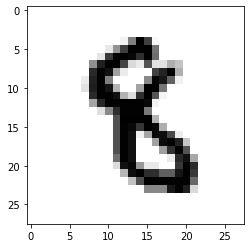

In [53]:
plt.imshow(image[0].numpy().reshape((28,28)),cmap=plt.cm.binary)

### MNIST Classification using tf.keras and Tensorboard for visualisation 

In [ ]:
import tensorflow as tf

In [7]:
from tensorflow.compat.v1.keras.datasets import mnist

In [8]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

In [9]:
import numpy as np

In [10]:
X_train, X_test=np.array(X_train,np.float32),np.array(X_test,np.float32)

In [11]:
X_train, X_test=X_train.reshape([-1,784]),X_test.reshape([-1,784])

In [12]:
X_train, X_test=X_train/255, X_test/255

In [13]:
%load_ext tensorboard

In [14]:
from datetime import datetime
import os

In [15]:
# Make a directory to keep the training logs
if os.path.isdir("logs"):
    print('already there')
else:
    os.mkdir("logs")

already there


In [16]:
# Set the callback
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10, activation='sigmoid')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
____________________________________________________

In [21]:
%tensorboard --logdir logs/
model.fit(X_train, Y_train,
         validation_data=(X_test, Y_test),
         batch_size=64,
         epochs=30,
         callbacks=[tensorboard_callback],
         verbose=True)

Reusing TensorBoard on port 6006 (pid 5273), started 0:00:42 ago. (Use '!kill 5273' to kill it.)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2403 - accuracy: 0.9270 - val_loss: 0.1283 - val_accuracy: 0.9611
Epoch 2/30
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2082 - accuracy: 0.9366 - val_loss: 0.1108 - val_accuracy: 0.9660
Epoch 3/30
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1918 - accuracy: 0.9415 - val_loss: 0.1076 - val_accuracy: 0.9664
Epoch 4/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1796 - accuracy: 0.9446 - val_loss: 0.0943 - val_accuracy: 0.9715
Epoch 5/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1682 - accuracy: 0.9479 - val_loss: 0.0990 - val_accuracy: 0.9687
Epoch 6/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1617 - accuracy: 0.9497 - val_loss: 0.0888 - val_accuracy: 0.9738
Epoch 7/30
60000/60000 [==============================] 

In [24]:
!kill 5273

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
model.evaluate(x=X_test,y=Y_test)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0708 - accuracy: 0.9787


[0.07084479398989352, 0.9787]

In [23]:
!kill 10682